In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [5]:
folder_dir = 'Instruments/'
file_paths = []
for file in os.listdir(folder_dir):
    file_paths.append(folder_dir + str(file))

noise_file = 'Noise/audiocheck.net_whitenoisegaussian.wav'

In [6]:
ipd.Audio(file_paths[0])

In [7]:
ipd.Audio(file_paths[1])

In [8]:
ipd.Audio(file_paths[2])

In [9]:
ipd.Audio(noise_file)

In [10]:
piano_data,sr = librosa.load(file_paths[1])
violin_data,_ = librosa.load(file_paths[2])
noise_data,_ = librosa.load(noise_file)

In [12]:
violin_data.shape

(59772,)

In [14]:
violin_ft = np.fft.fft(violin_data)
print(violin_ft.shape)

(59772,)


In [15]:
violin_ft[0]

(-0.853675452430456-5.162537064506978e-15j)

In [16]:
## we care about the magnitude of the fourier transform in all audio applications
magnitude_violin_ft = np.absolute(violin_ft)
magnitude_violin_ft

array([0.85367545, 0.1527218 , 0.08969853, ..., 0.02305469, 0.08969853,
       0.1527218 ])

In [23]:
def plot_magnitude_spectrum(signal,title,sample_rate,frequency_ratio = 1):
    signal_ft = np.fft.fft(signal)
    magnitude_ft = np.absolute(signal_ft)
    
    plt.figure(figsize=(20,8))
    frequency_bins = np.linspace(0,sample_rate,len(magnitude_ft)) 
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(str(title))
    ## We are obtaining a central symmetry so we plot half way or till the frequency we require
    frequency_bins = frequency_bins[:int(len(frequency_bins)*frequency_ratio)]
    magnitude_ft = magnitude_ft[:int(len(magnitude_ft)*frequency_ratio)]
    plt.plot(frequency_bins,magnitude_ft,color = 'r')
    plt.show()
    


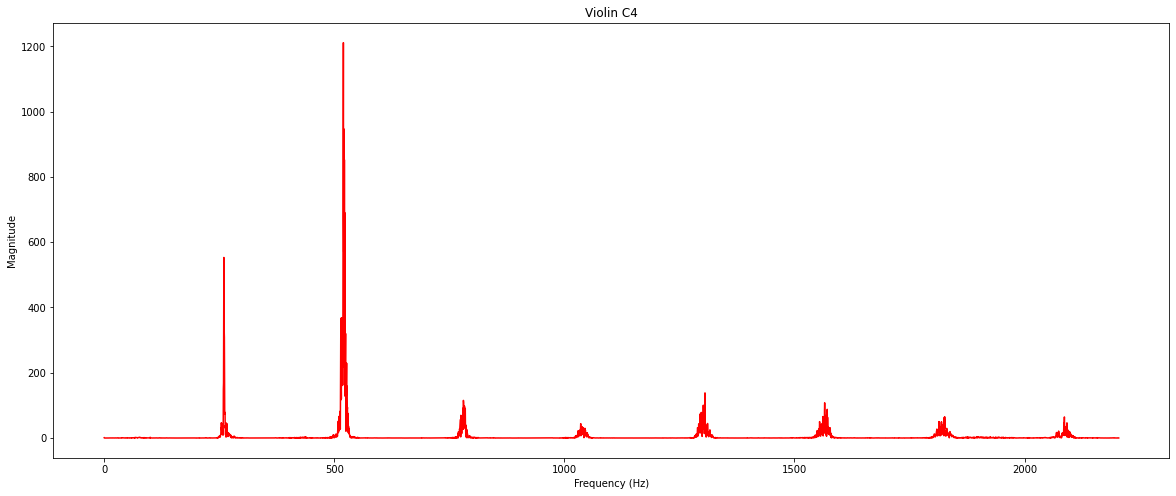

In [28]:
## C4 fundamental frequency = 260 Hz
plot_magnitude_spectrum(violin_data,'Violin C4',sample_rate=sr,frequency_ratio=0.1) 

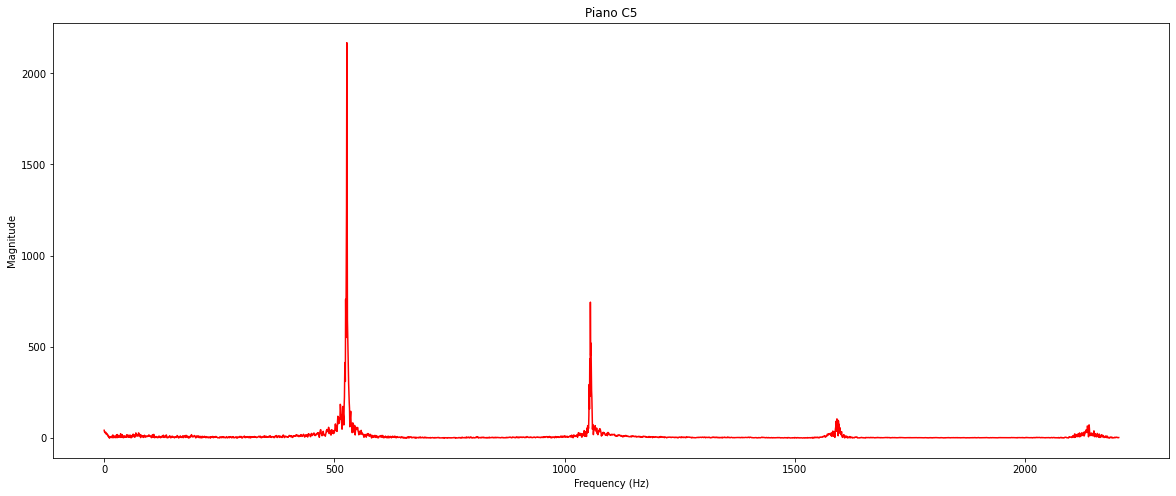

In [29]:
## C5 fund_freq = 520 Hz
plot_magnitude_spectrum(piano_data,'Piano C5',frequency_ratio=0.1,sample_rate = sr)

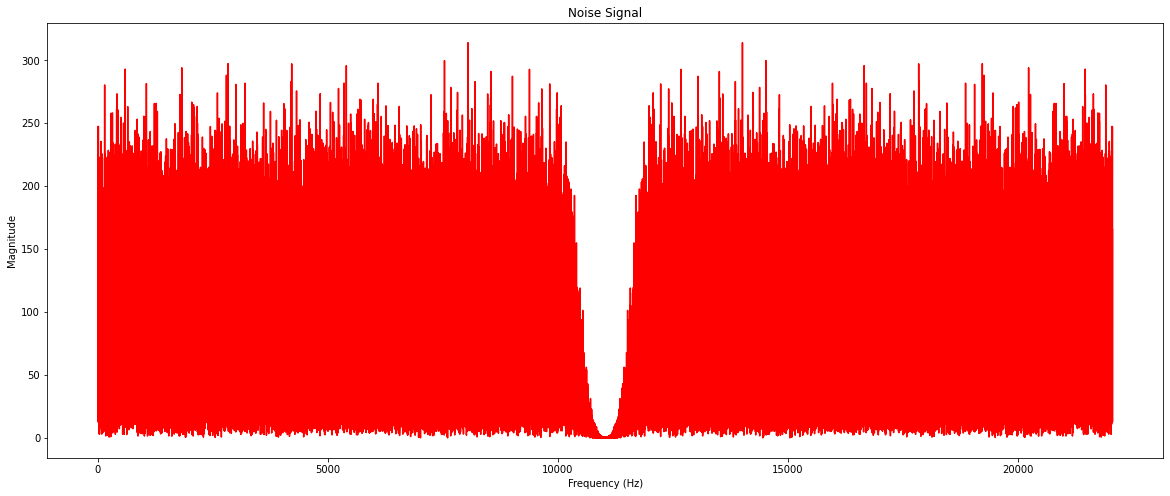

In [31]:
plot_magnitude_spectrum(noise_data,sample_rate=sr,title = 'Noise Signal',frequency_ratio=1)